# Logistic Regression From Scratch

**NOTE:** If you would simply like to test out the code, just run `$python3 logistic_regression.py` in your terminal.


## Table of Contents
1. Logistic Regression Hypothesis 
2. Loss Function & Intro to Negative Log-Likelihood (NLL)
3. Gradient Descent for NLL
4. Implimentation

<br />

---

## Hypothesis

Logistic Regression, though given the name, is a form of classification. Given the hypothesis $ w^{\top}x+b $ logistic regression makes use of the sigmoid non-linear activation function which maps inputs in the range $ (0, 1)$. Intuitivly this is to be thought as a probability of how right the classifier thinks it classified a point correctly or incorrectly. This sigmoid function is often denoted $\sigma(z)$ where $z = w^{\top}x+b $. Specifically, this sigmoid function is:

<br />

$$ \sigma(z) = \frac{1}{1 + e^{-(w^{\top}x+b)}} $$

<br />


For added intuition, plotting the sigmoid function gives: 

<img src="./logistic_regression/img/sigmoid_function.png" width="400" height="200">

Now the Logistic Regression would make the hypothesis:


<br />

$$
h(x ; w, b)=\left\{\begin{array}{ll}
1 & \text { if } \sigma(w^{\top}x+b)>=0.5 \\
0 & \text { if } \sigma(w^{\top}x+b) < 0.5 \\
\end{array}\right.
$$

<br />

---

## Loss Function - Negative Log-Likelihood (NLL)

Because the values are between 0 and 1 then we can think of a result given for some $x_i$ is the probability that the classifier believes it's either positive or negative. That is a guess on $x_i$ is $g_i = \sigma(w^{\top}x_i+b)$ where the probability $P(x)$ that a point is either negative or positive is $g_i$ if $y_i = 1$ and is $ 1 - g_i $ if $y_i = 0$. Using the laws of probability we can summarize this as:

$$ \prod_{i=1}^{n}\left\{\begin{array}{ll}
g_i & \text { if } y_i = 1 \\
1 - g_i & \text { if } y_i = 0 \\
\end{array}\right. $$

Using a very beautiful trick we can rewrite this entire thing as:

<br />

$$ \prod_{i=1}^{n} \; g_i^{y_i} \; (1-g_i)^{1-y_i} $$

<br />

But, in math we like summations and not big products like this. So to convert this to a sum we just use the log trick. Giving:

<br />

$$ \sum_{i=1}^{n} \; [y_i\log(g_i) \;+\; (1-y_i)\log(1-g_i)] $$

<br />

And this is out loss function. It is commonly known as the negative log-likelihood or log loss or cross entropy. The notation I will use for this loss funtion will be $\mathbb{L}_{NLL}(g_i, y_i) $.

Now that we have defined the loss, we can write our normalized objective function $J(w, b)$ for logistic regression as:

<br />

$$ J(w, b) = \frac{1}{n} \sum_{i=1}^{n} [\mathbb{L}_{NLL}(\sigma(w^{\top}x_i+b), y_i)] + \frac{\lambda}{2} \|w\|^{2} $$

<br />




---

## Gradient Descent

The typical gradient descent form for our weights and bias is as follows:

<br />

$$ w: \;\; w_{t+1} = w_{t} - \mu \nabla_{w}J(w, b) $$

<br />

$$ b: \;\; w_{t+1} = b_{t} - \mu \nabla_{b}J(w, b) $$

<br />

I am going to omit the proof but the derivative of our loss w.r.t. our weights are $ (\sigma(w^{\top}x_i+b) - y_i)x_i $ where $ \sigma(w^{\top}x_i+b) $ is our hypothesis, so this can simply be rewriten as: $ (h_i - y_i)x_i $. Similarly the update for our bias term can be written as:  $ (h_i - y_i) $. This leads to the following equation:

<br />

$$ w: \;\; w_{t+1} = w_{t} - \mu (\frac{1}{n} \sum_{i=1}^{n} [(\sigma(w^{\top}x_i+b) - y_i)x_i] + \lambda \|w\|)$$

<br />

$$ b: \;\; w_{t+1} = b_{t} - \mu (\frac{1}{n} \sum_{i=1}^{n} [(\sigma(w^{\top}x_i+b) - y_i)] + \lambda \|w\|) $$

<br />


---

## My Implimentation









In [34]:
# Imports
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [35]:
# Gather Data
n = 100
X, y = make_blobs(n_samples = n, centers = 2, random_state = 12)

y = y[:, np.newaxis]


In [36]:
# Sigmoid Activation Function
def sigmoid(z): 
    return 1.0 / (1.0 + np.exp(-z))


In [1]:
# Design the Model.

class LogisticRegression:
    def predict(self, X, w, b):
        return sigmoid(X.dot(w) + b)

    def loss(self, pred, y):
        """
        This is a numerically stable way to compute the loss. That is
        why it looks wierd. If you don't do this you will likely end up
        getting overflows.
        
        """
        NLL = (y * np.log(pred + 1e-6) + (1 - y) * np.log(1 - pred + 1e-6)) 
        return -np.sum(NLL) * (1.0 / self.m)

    def fit(self, X, y):
        eta = 0.01
        epochs = 5000

        self.m, self.n = X.shape

        # Declare the Weights
        self.weights = np.random.uniform(-1, 1, (self.n, 1))
        self.bias = np.random.uniform(-1, 1, (1, 1))

        for i in range(epochs):
            predicted = self.predict(X, self.weights, self.bias)

            # Show the loss every 500th epoch
            if i % 500 == 0: print("Loss on step {} is: {}".format(i, self.loss(predicted, y)))

            self.weights = self.weights - eta * X.T.dot(predicted - y)
            self.bias = self.bias - eta * np.sum(predicted - y)


In [41]:
# Instantiate and Fit the Model 
model = LogisticRegression()
model.fit(X, y)

# Grab the Weights and Bias
weight0, weight1 = model.weights
bias = model.bias[0][0]


Loss on step 0 is: 0.4459884197619967
Loss on step 500 is: 0.03562543561883667
Loss on step 1000 is: 0.02056306128077044
Loss on step 1500 is: 0.014915202660124357
Loss on step 2000 is: 0.011888555767224581
Loss on step 2500 is: 0.009974829294183099
Loss on step 3000 is: 0.008643202944225777
Loss on step 3500 is: 0.0076568411726937674
Loss on step 4000 is: 0.00689332071079478
Loss on step 4500 is: 0.00628263891582526


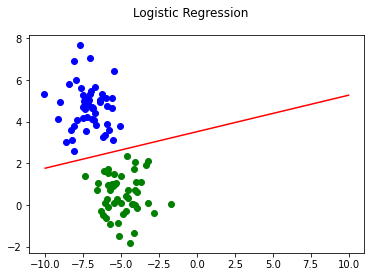

In [42]:
# Plot 

for i in range(n):
    if (y[i] == 1):
        plt.scatter(X[:, 0][i], X[:, 1][i], color="green") 
    else:
        plt.scatter(X[:, 0][i], X[:, 1][i], color="blue")
        
x = np.linspace(-10, 10, 10)

hyperplane = (-(weight0 / weight1) * x) - (bias / weight1)

plt.suptitle("Logistic Regression")

plt.plot(x, hyperplane, '-', color = "red")

plt.show()
